In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import sweetviz as sv
pd.set_option('display.max_columns', 500)

In [82]:
df1 = pd.read_csv('../data/merged_model_output.csv')
df1.head(1)

,city_munic,economic_ind,disaster_ind,industry_ind,healthcare_ind,poverty_ind,cluster_id,population,hospital,doctor,nurse,midwife,dentist,nutritioni,pharmacist,occupation,medical_techs,physical_techs,radiology,x-ray_techs
0,Aborlan,0.060652,-0.293379,-0.256356,-2.734656,-0.15229,1,35091,0,20,30,7,1,0,0,0,1,0,0,0


In [83]:
# analyze_report = sv.analyze(df1, target_feat='population')
# analyze_report.show_html('analyze.html')

In [84]:
df1.corr()

C:\Users\kmedr\AppData\Local\Temp\ipykernel_9280\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,economic_ind,disaster_ind,industry_ind,healthcare_ind,poverty_ind,cluster_id,population,hospital,doctor,nurse,midwife,dentist,nutritioni,pharmacist,occupation,medical_techs,physical_techs,radiology,x-ray_techs
economic_ind,1.000000,0.545650,0.554410,-0.138875,-0.001031,0.698240,-0.198735,-0.203603,-0.129939,-0.177336,-0.156210,-0.111793,-0.124248,-0.156776,-0.060332,-0.122241,-0.119123,-0.128350,-0.145112
disaster_ind,0.545650,1.000000,0.625538,-0.114950,-0.115418,0.492032,-0.216577,-0.221188,-0.155015,-0.214879,-0.186257,-0.134208,-0.142953,-0.179639,-0.069204,-0.138406,-0.145476,-0.143913,-0.173462
industry_ind,0.554410,0.625538,1.000000,-0.154925,-0.129064,0.515634,-0.218556,-0.223320,-0.136936,-0.191492,-0.160181,-0.120434,-0.127199,-0.160722,-0.059457,-0.117416,-0.117942,-0.122903,-0.155377
healthcare_ind,-0.138875,-0.114950,-0.154925,1.000000,0.004740,-0.556698,0.199757,0.188596,0.185953,0.202013,0.218124,0.123982,0.140180,0.176387,0.028686,0.128526,0.106926,0.146916,0.108553
poverty_ind,-0.001031,-0.115418,-0.129064,0.004740,1.000000,-0.012765,0.084759,0.073853,0.081567,0.111038,0.068275,0.081404,0.060051,0.056275,0.037934,0.060569,0.059648,0.053627,0.082683
cluster_id,0.698240,0.492032,0.515634,-0.556698,-0.012765,1.000000,-0.201133,-0.190076,-0.145143,-0.173576,-0.178902,-0.112588,-0.129450,-0.163796,-0.042971,-0.124861,-0.126199,-0.142032,-0.136020
population,-0.198735,-0.216577,-0.218556,0.199757,0.084759,-0.201133,1.000000,0.845902,0.414806,0.431036,0.584756,0.532863,0.737545,0.696140,0.640984,0.728870,0.710586,0.763010,0.725969
hospital,-0.203603,-0.221188,-0.223320,0.188596,0.073853,-0.190076,0.845902,1.000000,0.618319,0.628902,0.741687,0.711714,0.866593,0.825907,0.710406,0.842646,0.792356,0.831123,0.774523
doctor,-0.129939,-0.155015,-0.136936,0.185953,0.081567,-0.145143,0.414806,0.618319,1.000000,0.874690,0.811112,0.828931,0.654389,0.669943,0.297903,0.668396,0.609090,0.659617,0.358620
nurse,-0.177336,-0.214879,-0.191492,0.202013,0.111038,-0.173576,0.431036,0.628902,0.874690,1.000000,0.733361,0.702446,0.592684,0.645135,0.222421,0.591576,0.606152,0.605647,0.439642


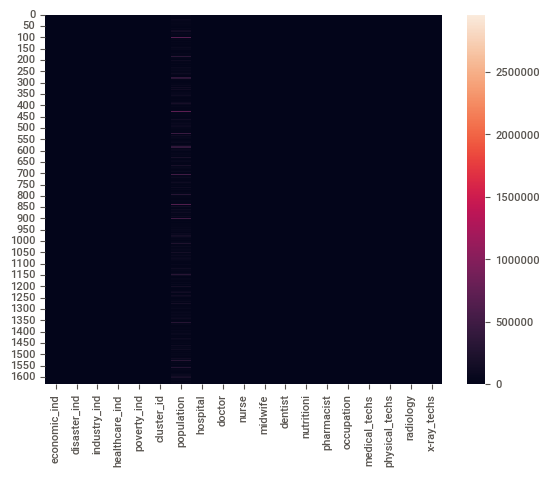

In [85]:
sns.heatmap(df1.iloc[: , 1:])
plt.show()

In [86]:
data = pd.read_csv('complete_dataset.csv')
merged = pd.read_csv('../../../data_v2/health-facilities-2021_v2.csv')
pov = pd.read_csv('../../../data_v2/cities_poverty_indexe_v2.csv')
modelled = pd.read_csv('../../task-4-modelling/dti_consolidated_final.csv')
pop = pd.read_csv('../../../data_v2/population_data_v2.csv', thousands=',')

In [87]:
data.head(1)

,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_internet_service,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,Aborlan,2017,0.0000,0.2120,2.5000,-,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.4592,1.8750,0.0012,0.0039,2.5000,0.4161,0.0000,2.5000,0.0145,0.2879,0.0000,0.1943,1.5706,0.1104,0.0204,0.9949


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 42 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   city_municipality                                    9792 non-null   object
 1   year                                                 9792 non-null   int64 
 2   accommodation_capacity                               9792 non-null   object
 3   active_establishments_in_the_locality                9792 non-null   object
 4   annual_disaster_drill                                9792 non-null   object
 5   availability_of_basic_internet_service               9792 non-null   object
 6   availability_of_basic_utilities                      9792 non-null   object
 7   budget_for_drrmp                                     9792 non-null   object
 8   capacity_of_health_services                          9792 non-null   object
 9

In [89]:
merged.head(1)

,name,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Total,year
0,Aborlan,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,2021


In [90]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   name                                             1632 non-null   object 
 1   Ambulatory Surgical Clinic                       1631 non-null   float64
 2   Animal Bite Treatment Center                     1631 non-null   float64
 3   Barangay Health Station                          1631 non-null   float64
 4   Birthing Home                                    1631 non-null   float64
 5   City Health Office                               1631 non-null   float64
 6   COVID-19 Testing Laboratory                      1631 non-null   float64
 7   DepEd Clinic                                     1631 non-null   float64
 8   Dialysis Clinic                                  1631 non-null   float64
 9   Drug Abuse Treatment and Rehab

In [91]:
mask = merged.isnull().any(axis=1)
rows_with_null = merged[mask]
print(rows_with_null)

              name  Ambulatory Surgical Clinic  Animal Bite Treatment Center  \
640  Kalayaan (PN)                         NaN                           NaN   

     Barangay Health Station  Birthing Home  City Health Office  \
640                      NaN            NaN                 NaN   

     COVID-19 Testing Laboratory  DepEd Clinic  Dialysis Clinic  \
640                          NaN           NaN              NaN   

     Drug Abuse Treatment and Rehabilitation Centers  Drug Testing Laboratory  \
640                                              NaN                      NaN   

     General Clinic Laboratory  Hospital  Infirmary  Municipal Health Office  \
640                        NaN       NaN        NaN                      NaN   

     Provincial Health Office  Psychiatric Care Facility  Rural Health Unit  \
640                       NaN                        NaN                NaN   

     Social hygiene Clinic  Total  year  
640                    NaN    NaN  2021  


In [92]:
merged.fillna(value=0, inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   name                                             1632 non-null   object 
 1   Ambulatory Surgical Clinic                       1632 non-null   float64
 2   Animal Bite Treatment Center                     1632 non-null   float64
 3   Barangay Health Station                          1632 non-null   float64
 4   Birthing Home                                    1632 non-null   float64
 5   City Health Office                               1632 non-null   float64
 6   COVID-19 Testing Laboratory                      1632 non-null   float64
 7   DepEd Clinic                                     1632 non-null   float64
 8   Dialysis Clinic                                  1632 non-null   float64
 9   Drug Abuse Treatment and Rehab

In [93]:
pov.head(1)

,municipality,pov_inc
0,Aborlan,13.33


In [94]:
pov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   municipality  1632 non-null   object 
 1   pov_inc       1632 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.6+ KB


In [95]:
merged.columns.to_list()

['name',
 'Ambulatory Surgical Clinic',
 'Animal Bite Treatment Center',
 'Barangay Health Station',
 'Birthing Home',
 'City Health Office',
 'COVID-19 Testing Laboratory',
 'DepEd Clinic',
 'Dialysis Clinic',
 'Drug Abuse Treatment and Rehabilitation Centers',
 'Drug Testing Laboratory',
 'General Clinic Laboratory',
 'Hospital',
 'Infirmary',
 'Municipal Health Office',
 'Provincial Health Office',
 'Psychiatric Care Facility',
 'Rural Health Unit',
 'Social hygiene Clinic',
 'Total',
 'year']

In [96]:
merged_data = merged[
    ['name', 'Hospital',
    'Barangay Health Station',
    'Rural Health Unit',
    'COVID-19 Testing Laboratory',
    'Infirmary',]]
merged_data

,name,Hospital,Barangay Health Station,Rural Health Unit,COVID-19 Testing Laboratory,Infirmary
0,Aborlan,1.0,18.0,1.0,0.0,0.0
1,Abra De Ilog,0.0,9.0,1.0,0.0,1.0
2,Abucay,0.0,11.0,1.0,0.0,0.0
3,Abulug,1.0,8.0,1.0,0.0,0.0
4,Abuyog,1.0,17.0,2.0,0.0,0.0
...,...,...,...,...,...,...
1627,Zamboanga,13.0,87.0,17.0,4.0,3.0
1628,Zamboanguita,0.0,10.0,1.0,0.0,0.0
1629,Zaragoza,0.0,6.0,2.0,0.0,0.0
1630,Zarraga,0.0,4.0,1.0,0.0,0.0


In [97]:
pov.head(1)

,municipality,pov_inc
0,Aborlan,13.33


In [98]:
pov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   municipality  1632 non-null   object 
 1   pov_inc       1632 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.6+ KB


In [99]:
modelled.head(1)

,Unnamed: 0,Presence of Investment Promotion Unit,Land Use Plan,Population,Local Economy Growth,Availability of Basic Utilities,Budget for DRRMP,Capacity of School Services,Transportation Vehicles,Education,Poverty_Incidents,Cluster_Id
0,Aborlan,0.66668,0.96924,0.054114,0.006795,0.84188,0.058914,0.025599,0.006791,0.118616,0.141845,2


In [100]:
modelled_data = modelled[
    ['Unnamed: 0', 'Cluster_Id']]
modelled_data

,Unnamed: 0,Cluster_Id
0,Aborlan,2
1,Abra De Ilog,1
2,Abucay,2
3,Abulug,1
4,Abuyog,2
...,...,...
1627,Zamboanga,0
1628,Zamboanguita,1
1629,Zaragoza,2
1630,Zarraga,2


In [101]:
pop.head(1)

,city_municipality,population
0,Aborlan,35091


In [102]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city_municipality  1632 non-null   object
 1   population         1632 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


In [103]:
merged_data

,name,Hospital,Barangay Health Station,Rural Health Unit,COVID-19 Testing Laboratory,Infirmary
0,Aborlan,1.0,18.0,1.0,0.0,0.0
1,Abra De Ilog,0.0,9.0,1.0,0.0,1.0
2,Abucay,0.0,11.0,1.0,0.0,0.0
3,Abulug,1.0,8.0,1.0,0.0,0.0
4,Abuyog,1.0,17.0,2.0,0.0,0.0
...,...,...,...,...,...,...
1627,Zamboanga,13.0,87.0,17.0,4.0,3.0
1628,Zamboanguita,0.0,10.0,1.0,0.0,0.0
1629,Zaragoza,0.0,6.0,2.0,0.0,0.0
1630,Zarraga,0.0,4.0,1.0,0.0,0.0


In [105]:
merged_data['Cluster_Id'] = modelled_data['Cluster_Id']
merged_data

,name,Hospital,Barangay Health Station,Rural Health Unit,COVID-19 Testing Laboratory,Infirmary,Cluster_Id
0,Aborlan,1.0,18.0,1.0,0.0,0.0,2
1,Abra De Ilog,0.0,9.0,1.0,0.0,1.0,1
2,Abucay,0.0,11.0,1.0,0.0,0.0,2
3,Abulug,1.0,8.0,1.0,0.0,0.0,1
4,Abuyog,1.0,17.0,2.0,0.0,0.0,2
...,...,...,...,...,...,...,...
1627,Zamboanga,13.0,87.0,17.0,4.0,3.0,0
1628,Zamboanguita,0.0,10.0,1.0,0.0,0.0,1
1629,Zaragoza,0.0,6.0,2.0,0.0,0.0,2
1630,Zarraga,0.0,4.0,1.0,0.0,0.0,2


In [106]:
merged_data['Poverty_Incidents'] = pov['pov_inc']
merged_data

C:\Users\kmedr\AppData\Local\Temp\ipykernel_9280\121772895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Poverty_Incidents'] = pov['pov_inc']


,name,Hospital,Barangay Health Station,Rural Health Unit,COVID-19 Testing Laboratory,Infirmary,Cluster_Id,Poverty_Incidents
0,Aborlan,1.0,18.0,1.0,0.0,0.0,2,13.33
1,Abra De Ilog,0.0,9.0,1.0,0.0,1.0,1,20.46
2,Abucay,0.0,11.0,1.0,0.0,0.0,2,5.30
3,Abulug,1.0,8.0,1.0,0.0,0.0,1,14.79
4,Abuyog,1.0,17.0,2.0,0.0,0.0,2,28.17
...,...,...,...,...,...,...,...,...
1627,Zamboanga,13.0,87.0,17.0,4.0,3.0,0,18.00
1628,Zamboanguita,0.0,10.0,1.0,0.0,0.0,1,17.50
1629,Zaragoza,0.0,6.0,2.0,0.0,0.0,2,3.82
1630,Zarraga,0.0,4.0,1.0,0.0,0.0,2,10.83


In [107]:
merged_data['Population'] = pop['population']
merged_data

C:\Users\kmedr\AppData\Local\Temp\ipykernel_9280\1007120054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Population'] = pop['population']


,name,Hospital,Barangay Health Station,Rural Health Unit,COVID-19 Testing Laboratory,Infirmary,Cluster_Id,Poverty_Incidents,Population
0,Aborlan,1.0,18.0,1.0,0.0,0.0,2,13.33,35091
1,Abra De Ilog,0.0,9.0,1.0,0.0,1.0,1,20.46,31306
2,Abucay,0.0,11.0,1.0,0.0,0.0,2,5.30,42984
3,Abulug,1.0,8.0,1.0,0.0,0.0,1,14.79,32497
4,Abuyog,1.0,17.0,2.0,0.0,0.0,2,28.17,59571
...,...,...,...,...,...,...,...,...,...
1627,Zamboanga,13.0,87.0,17.0,4.0,3.0,0,18.00,977234
1628,Zamboanguita,0.0,10.0,1.0,0.0,0.0,1,17.50,27552
1629,Zaragoza,0.0,6.0,2.0,0.0,0.0,2,3.82,53090
1630,Zarraga,0.0,4.0,1.0,0.0,0.0,2,10.83,27305


In [199]:
merged_data.columns.to_list()

['name',
 'Hospital',
 'Barangay Health Station',
 'Rural Health Unit',
 'COVID-19 Testing Laboratory',
 'Infirmary',
 'Cluster_Id',
 'Poverty_Incidents',
 'Population']

In [200]:
merged_data = merged_data[
    ['name','Hospital', 'Infirmary',
    'Barangay Health Station', 'Rural Health Unit',
    'COVID-19 Testing Laboratory', 'Poverty_Incidents',
    'Population', 'Cluster_Id']]

In [201]:
merged_data.rename({'name': 'City', 'COVID-19 Testing Laboratory': 'COVID Testing Lab'}, axis=1, inplace=True)
merged_data.head(1)

,City,Hospital,Infirmary,Barangay Health Station,Rural Health Unit,COVID Testing Lab,Poverty_Incidents,Population,Cluster_Id
0,Aborlan,1.0,0.0,18.0,1.0,0.0,13.33,35091,2


In [202]:
merged_data['Vulnerability'] = merged_data['Cluster_Id'].apply(lambda x:'low' if x==0 else('medium'if x==2 else 'high'))
merged_data.head(1)

,City,Hospital,Infirmary,Barangay Health Station,Rural Health Unit,COVID Testing Lab,Poverty_Incidents,Population,Cluster_Id,Vulnerability
0,Aborlan,1.0,0.0,18.0,1.0,0.0,13.33,35091,2,medium


In [2]:
gdf1 = gpd.read_file('../../../data/geolocation/ph_cities_joined_v2/ph_cities_v2.shp')
gdf1.head(1)

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168","MULTIPOLYGON (((118.57998 9.37215, 118.57982 9..."


In [4]:
gdf2 = gdf1[['name', 'province', 'latitude', 'longitude', 'geometry']]
gdf2.set_index('name', inplace=True)
gdf2.index.name = 'city_municipality'
gdf2

,province,latitude,longitude,geometry
city_municipality,,,,
Aborlan,Palawan,9.437101,118.548417,"MULTIPOLYGON (((118.57998 9.37215, 118.57982 9..."
Abra De Ilog,Occidental Mindoro,13.443721,120.726826,"POLYGON ((120.60896 13.35233, 120.60797 13.373..."
Abucay,Bataan,14.721315,120.534870,"POLYGON ((120.45676 14.69671, 120.45620 14.696..."
Abulug,Cagayan,18.443485,121.457273,"MULTIPOLYGON (((121.40276 18.40896, 121.40276 ..."
Abuyog,Leyte,10.747102,125.011485,"POLYGON ((125.04650 10.56751, 125.04588 10.576..."
...,...,...,...,...
Zamboanga,Zamboanga del Sur,6.921400,122.079000,"MULTIPOLYGON (((122.06639 6.86972, 122.06639 6..."
Zamboanguita,Negros Oriental,9.100465,123.199424,"POLYGON ((123.20750 9.10485, 123.20722 9.10443..."
Zaragoza,Nueva Ecija,15.447583,120.793554,"POLYGON ((120.81170 15.47132, 120.81309 15.470..."


In [ ]:
gdf2.to_parquet('geometry.parquet')

In [213]:
merged_data['Province'].str.strip()

0                  Palawan
1       Occidental Mindoro
2                   Bataan
3                  Cagayan
4                    Leyte
               ...        
1627           Catanduanes
1628         Lanao del Sur
1629     Zamboanga del Sur
1630       Negros Oriental
1631           Nueva Ecija
Name: Province, Length: 1632, dtype: object

In [224]:
merged_data['Province'] = merged_data['Province'].astype(str)
merged_data['Province'].dtypes

dtype('O')

In [217]:
merged_data['Province'].unique()

array(['Palawan', 'Occidental Mindoro', 'Bataan', 'Cagayan', 'Leyte',
       'Ilocos Norte', 'Quezon', 'Quirino', 'Pangasinan', 'Batangas',
       'La Union', 'Ifugao', 'Iloilo', 'Basilan', 'Sarangani', 'Cotabato',
       'Laguna', 'Bohol', 'Cebu', 'Romblon', 'Surigao del Norte',
       'Cavite', 'Nueva Vizcaya', 'Nueva Ecija', 'Isabela',
       'Zamboanga Sibugay', 'Ilocos Sur', 'Northern Samar', 'Samar',
       'Biliran', 'Misamis Occidental', 'Aklan', 'Misamis Oriental',
       'Lanao del Sur', 'Negros Oriental', 'Maguindanao del Sur',
       'Southern Leyte', 'Tarlac', 'Bulacan', 'Pampanga', 'Rizal',
       'Antique', 'Masbate', 'Eastern Samar', 'Davao del Norte',
       'Benguet', 'Zamboanga del Sur', 'Camarines Sur', 'Albay',
       'Oriental Mindoro', 'Lanao del Norte', 'Negros Occidental',
       'Zamboanga del Norte', 'Catanduanes', 'Davao Oriental',
       'Sultan Kudarat', 'Kalinga', 'Aurora', 'South Cotabato', 'Abra',
       'Davao del Sur', 'Sorsogon', 'Maguindanao del Nor

In [212]:
cond = merged_data[merged_data['Province'] == 'Bataan']['Latitude'].tolist()
cond

[14.7213146,
 14.5967431,
 14.6795669,
 14.8673996,
 14.8302478,
 14.5625242,
 14.4341194,
 14.6779981,
 14.8012181,
 14.62157,
 14.6669245,
 14.7693766]

In [108]:
gdf1

NameError: name 'gdf1' is not defined

In [204]:
merged_data[['Province', 'Longitude', 'Latitude', 'Geometry']] = gdf1[['province', 'longitude', 'latitude', 'geometry']]
merged_data.head()

,City,Hospital,Infirmary,Barangay Health Station,Rural Health Unit,COVID Testing Lab,Poverty_Incidents,Population,Cluster_Id,Vulnerability,Province,Longitude,Latitude,Geometry
0,Aborlan,1.0,0.0,18.0,1.0,0.0,13.33,35091,2,medium,Palawan,118.548417,9.437101,"MULTIPOLYGON (((118.57998 9.37215, 118.57982 9..."
1,Abra De Ilog,0.0,1.0,9.0,1.0,0.0,20.46,31306,1,high,Occidental Mindoro,120.726826,13.443721,"POLYGON ((120.60896 13.35233, 120.60797 13.373..."
2,Abucay,0.0,0.0,11.0,1.0,0.0,5.30,42984,2,medium,Bataan,120.534870,14.721315,"POLYGON ((120.45676 14.69671, 120.45620 14.696..."
3,Abulug,1.0,0.0,8.0,1.0,0.0,14.79,32497,1,high,Cagayan,121.457273,18.443485,"MULTIPOLYGON (((121.40276 18.40896, 121.40276 ..."
4,Abuyog,1.0,0.0,17.0,2.0,0.0,28.17,59571,2,medium,Leyte,125.011485,10.747102,"POLYGON ((125.04650 10.56751, 125.04588 10.576..."


In [205]:
merged_data.columns.to_list()

['City',
 'Hospital',
 'Infirmary',
 'Barangay Health Station',
 'Rural Health Unit',
 'COVID Testing Lab',
 'Poverty_Incidents',
 'Population',
 'Cluster_Id',
 'Vulnerability',
 'Province',
 'Longitude',
 'Latitude',
 'Geometry']

In [206]:
merged_data = merged_data[
        ['City', 'Province', 'Hospital',
        'Infirmary', 'Barangay Health Station',
        'Rural Health Unit', 'COVID Testing Lab', 'Poverty_Incidents',
        'Population', 'Cluster_Id', 'Vulnerability', 'Longitude',
        'Latitude', 'Geometry']]

In [207]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City                     1632 non-null   object  
 1   Province                 1632 non-null   object  
 2   Hospital                 1632 non-null   float64 
 3   Infirmary                1632 non-null   float64 
 4   Barangay Health Station  1632 non-null   float64 
 5   Rural Health Unit        1632 non-null   float64 
 6   COVID Testing Lab        1632 non-null   float64 
 7   Poverty_Incidents        1632 non-null   float64 
 8   Population               1632 non-null   int64   
 9   Cluster_Id               1632 non-null   int64   
 10  Vulnerability            1632 non-null   object  
 11  Longitude                1632 non-null   float64 
 12  Latitude                 1632 non-null   float64 
 13  Geometry                 1624 non-null   geometry
dtypes: float

In [208]:
mask = merged_data.isnull().any(axis=1)
rows_with_null = merged_data[mask]
rows_with_null['City'].to_list()

['Datu Odin Sinsuat',
 'Datu Saudi-Ampatuan',
 'Hadji Panglima Tahil',
 'Isulan',
 'Kalibo',
 'Opol',
 'Siasi',
 'Tabuelan']

In [246]:
merged_data.rename({'geometry': 'Geom'}, axis=1, inplace=True)

In [247]:
merged_data.head(1)

,City,Province,Hospital,Infirmary,Barangay Health Station,Rural Health Unit,COVID Testing Lab,Poverty_Incidents,Population,Cluster_Id,Vulnerability,Longitude,Latitude,Geom
0,Aborlan,Palawan,1.0,0.0,18.0,1.0,0.0,13.33,35091,2,medium,118.548417,9.437101,"MULTIPOLYGON (((118.57998 9.37215, 118.57982 9..."


In [248]:
merged_data.to_csv('mapping_data.csv', index=False)

In [255]:
merged_geo_data = gpd.GeoDataFrame(merged_data, geometry='Geom')

In [257]:
type(merged_geo_data)

geopandas.geodataframe.GeoDataFrame

In [258]:
merged_geo_data.to_csv('mapping_data.csv', index=False)

In [259]:
merged_geo_data.to_parquet('mapping_data.parquet', compression='gzip')

In [252]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 0 to 1631
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City                     1632 non-null   object  
 1   Province                 1632 non-null   object  
 2   Hospital                 1632 non-null   float64 
 3   Infirmary                1632 non-null   float64 
 4   Barangay Health Station  1632 non-null   float64 
 5   Rural Health Unit        1632 non-null   float64 
 6   COVID Testing Lab        1632 non-null   float64 
 7   Poverty_Incidents        1632 non-null   float64 
 8   Population               1632 non-null   int64   
 9   Cluster_Id               1632 non-null   int64   
 10  Vulnerability            1632 non-null   object  
 11  Longitude                1632 non-null   float64 
 12  Latitude                 1632 non-null   float64 
 13  Geom                     1624 non-null   geometry
dtypes: float

In [254]:
merged_data['Geom'].plot()

TypeError: no numeric data to plot

In [249]:
test2 = pd.read_csv('mapping_data.csv')
test2.head(1)

,City,Province,Hospital,Infirmary,Barangay Health Station,Rural Health Unit,COVID Testing Lab,Poverty_Incidents,Population,Cluster_Id,Vulnerability,Longitude,Latitude,Geom
0,Aborlan,Palawan,1.0,0.0,18.0,1.0,0.0,13.33,35091,2,medium,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...


In [250]:
test = gpd.read_file('mapping_data.csv')
test

,City,Province,Hospital,Infirmary,Barangay Health Station,Rural Health Unit,COVID Testing Lab,Poverty_Incidents,Population,Cluster_Id,Vulnerability,Longitude,Latitude,Geom,geometry
0,Aborlan,Palawan,1.0,0.0,18.0,1.0,0.0,13.33,35091,2,medium,118.5484168,9.4371009,MULTIPOLYGON (((118.57997900000032 9.372150000...,None
1,Abra De Ilog,Occidental Mindoro,0.0,1.0,9.0,1.0,0.0,20.46,31306,1,high,120.7268262,13.4437209,POLYGON ((120.60896301200034 13.35233020800012...,None
2,Abucay,Bataan,0.0,0.0,11.0,1.0,0.0,5.3,42984,2,medium,120.5348704,14.7213146,POLYGON ((120.45675659200003 14.69670963300006...,None
3,Abulug,Cagayan,1.0,0.0,8.0,1.0,0.0,14.79,32497,1,high,121.4572732,18.4434854,MULTIPOLYGON (((121.40276336600016 18.40896034...,None
4,Abuyog,Leyte,1.0,0.0,17.0,2.0,0.0,28.17,59571,2,medium,125.0114853,10.747102,POLYGON ((125.04650115900006 10.56750965100002...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,Zamboanga,Catanduanes,13.0,3.0,87.0,17.0,4.0,18.0,977234,0,low,124.2310553,13.5808157,POLYGON ((124.19309234600007 13.51863002800013...,None
1628,Zamboanguita,Lanao del Sur,0.0,0.0,10.0,1.0,0.0,17.5,27552,1,high,124.7254775,7.6384156,POLYGON ((124.80255889800003 7.623189927000112...,None
1629,Zaragoza,Zamboanga del Sur,0.0,0.0,6.0,2.0,0.0,3.82,53090,2,medium,122.079,6.9214,MULTIPOLYGON (((122.06639100100006 6.869720001...,None
1630,Zarraga,Negros Oriental,0.0,0.0,4.0,1.0,0.0,10.83,27305,2,medium,123.1994244,9.1004649,"POLYGON ((123.20749664200002 9.10484981500008,...",None
